In [90]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import soundfile as sf
import torch

In [3]:
audio_path = r"D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\audio_wav\lec_01.wav"

In [6]:
audio_nd = librosa.load(audio_path)


In [97]:
print(audio_nd[0].shape)

(90721859,)


Text(0.5, 1.0, 'Spectrogram')

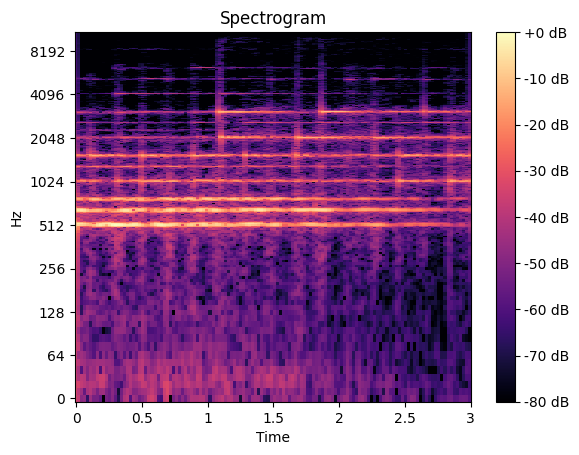

In [23]:
spec = np.abs(librosa.stft(audio_nd[0][200000:266150], hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=22050, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

In [98]:
audio_size = audio_nd[0].shape[0]
save_path = r"D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented"
if not os.path.exists(save_path):
    os.makedirs(save_path)
print(audio_size)
seg_size = 22050 * 3
count = 1
for i in range(0,audio_size,seg_size):
    seg_file = os.path.join(save_path,"seg_%d.wav" % count)
    seg_nd = audio_nd[0][i:(i+seg_size)]
    print(seg_nd.shape[0]//22050)
    sf.write(seg_file, seg_nd, samplerate = 22050)
    print("saved to:",seg_file)
    count+=1

90721859
3
saved to: D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_1.wav
3
saved to: D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_2.wav
3
saved to: D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_3.wav
3
saved to: D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_4.wav
3
saved to: D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_5.wav
3
saved to: D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_6.wav
3
saved to: D:\OneDrive - Habib University\acedemics\se

### Begin Melspectogram Generation

In [59]:
def seg_sorter(seg: str):
    splitted = seg.split('.')
    return int(splitted[0][4:])

In [62]:
data_arr = []
path = os.listdir(save_path)
#print(path)
path.sort(key=seg_sorter)
#print(path)
for file in path:
    seg_arr = []
    print(file)
    seg_file_temp = os.path.join(save_path,file)
    audio_seg_temp = librosa.load(seg_file_temp)
    data_arr.append(audio_seg_temp)
    print(seg_file_temp)

seg_1.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_1.wav
seg_2.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_2.wav
seg_3.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_3.wav
seg_4.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_4.wav
seg_5.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_5.wav
seg_6.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\project_files\dataset\Theory of Automata in Urdu\lec_01_audio_segmented\seg_6.wav
seg_7.wav
D:\OneDrive - Habib University\acedemics\semester5\DL\project\proj

In [91]:
print(len(data_arr))

1372


In [96]:
print(data_arr[0][0].shape)

[(array([0.        , 0.        , 0.        , ..., 0.00463867, 0.00274658,
       0.00097656], dtype=float32), 22050), (array([-0.00033569, -0.00164795, -0.00241089, ...,  0.00860596,
        0.00765991,  0.0055542 ], dtype=float32), 22050), (array([ 0.00268555, -0.00079346, -0.00463867, ..., -0.09738159,
       -0.09503174, -0.08734131], dtype=float32), 22050), (array([-0.06869507, -0.04788208, -0.03869629, ...,  0.00900269,
       -0.01367188, -0.03109741], dtype=float32), 22050), (array([-0.04101562, -0.04162598, -0.03381348, ..., -0.06121826,
       -0.05258179, -0.04415894], dtype=float32), 22050), (array([-0.03491211, -0.02804565, -0.02676392, ...,  0.02410889,
        0.0302124 ,  0.02615356], dtype=float32), 22050), (array([ 0.01464844, -0.00045776, -0.01455688, ...,  0.14697266,
        0.05072021, -0.31558228], dtype=float32), 22050), (array([ 0.29760742,  0.45794678, -0.0105896 , ...,  0.02478027,
        0.02792358,  0.0269165 ], dtype=float32), 22050), (array([0.02401733, 0

(1025, 130)


Text(0.5, 1.0, 'Spectrogram')

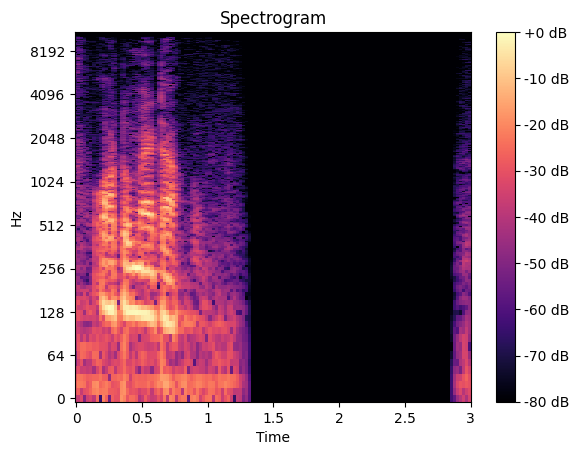

In [82]:
spec = np.abs(librosa.stft(data_arr[11][0], hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
print(spec.shape)
librosa.display.specshow(spec, sr=22050, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

C:\Users\IDEAL COMPUTER'S\AppData\Local\Temp\ipykernel_6540\873290025.py:1: FutureWarning: Pass y=[0.03179932 0.03070068 0.02133179 ... 0.01220703 0.01177979 0.00827026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = librosa.feature.melspectrogram(data_arr[11][0])


(128, 130)


Text(0.5, 1.0, 'Spectrogram')

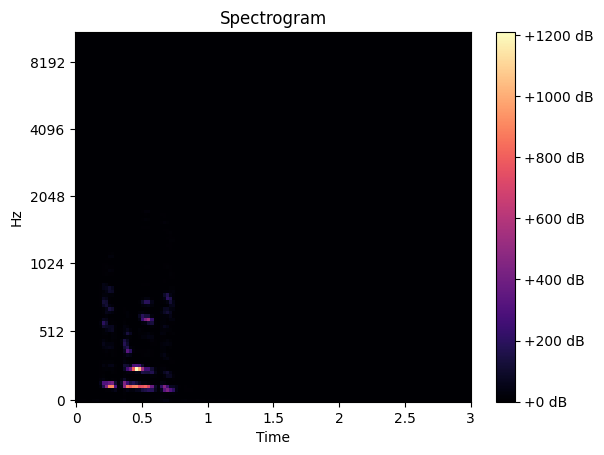

In [83]:
spec = librosa.feature.melspectrogram(data_arr[11][0])
print(spec.shape)
librosa.display.specshow(spec, sr=22050, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

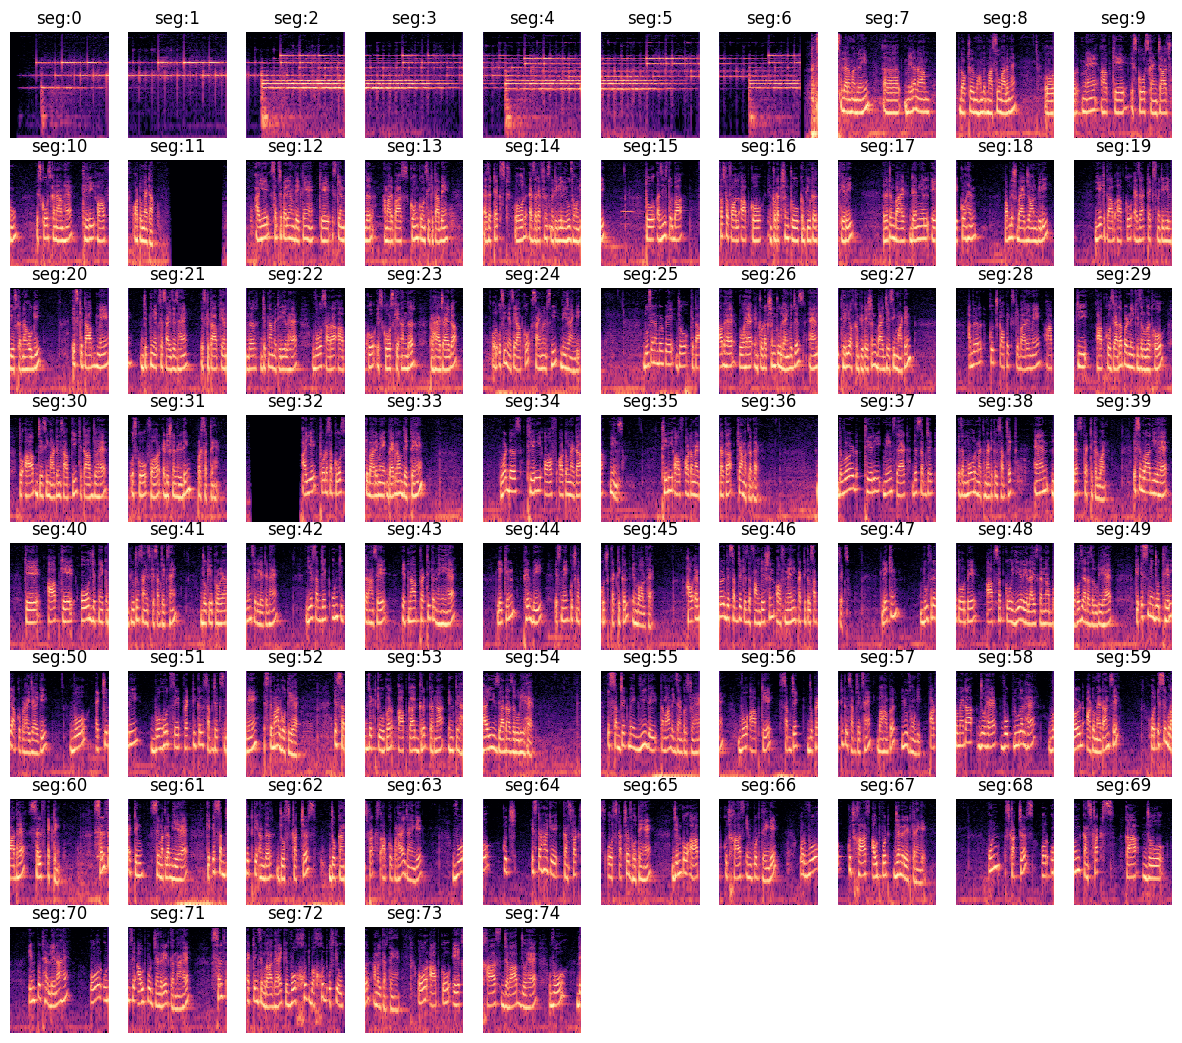

In [79]:
fig = plt.figure(figsize=(15,13))
for i in range(75):  
    ax = fig.add_subplot(8, 10, i+1)
    spec = np.abs(librosa.stft(data_arr[i][0], hop_length=512))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    librosa.display.specshow(spec, sr=22050, x_axis='time', y_axis='log')
    #ax.colorbar(format='%+2.0f dB')
    ax.set_title('seg:{y}'.format(y=i))
    ax.axis('off')

In [94]:
import IPython.display as ipd
ipd.Audio(data_arr[43][0], rate=22050)

22050


In [89]:
waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp16')
waveglow = waveglow.remove_weightnorm(waveglow)

c:\Users\IDEAL COMPUTER'S\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to C:\Users\IDEAL COMPUTER'S/.cache\torch\hub\torchhub.zip


FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\IDEAL COMPUTER'S\\.cache\\torch\\hub\\NVIDIA-DeepLearningExamples-9cb7dd0\\CUDA-Optimized\\FastSpeech\\fastspeech\\trt\\samples\\To deliver interfaces that are significantly better suited to create and process RFC eight twenty one, RFC eight twenty two, RFC.wav"